# **Tarea #3: Implementación de un perceptrón clasificador para clasificación binaria**
### **Desde cero**

# Universidad de Monterrey

* Estudiante: Jonathan A. Valadez Saldaña

* Materia: Inteligencia Artificial II

* Profesor:  Andrés Hernández  Gutiérrez 

19/Septiembre/2024 - San Pedro Garza García, N.L.

Siempre cuando se empieza un código en python es importante importar las librerías que vayamos a ocupar para nuestro programa, en este caso usamos las siguientes librerías que cuentan con las siguientes características:
* **Fetchucimlrepo_ucirepo  > fetch_ucirepo:** Paquete para importar fácilmente datasets desde el repositorio de UC Irvine Machine Learning  a scripts y cuadernos.
* **Pandas:** Se usa para leer y guardar datos (ingeniería de datos)
* **Plotly.express:** Es una herramienta versátil y  útil para crear cualquier tipo de gráfica como: lineal, de barras, circular, de burbuja, histogramas, diagrama de cajas, barras de error, diagramas de dispersión, gráficas polares, mapas de color, etc.
* **Seaborn**: Nos permite desplegar gráficas estadísticas
* **Matplotlib:** Visualización  de gráficas de datos
* **Numpy:** Nos ayuda a realizar operaciones matemáticas
* **Tensorflow:** Nos permite el desarrollo de redes neuronales 
* **Sklearn.model_selection > train_test_split:** Nos permite dividir los datos de entrenamiento y los de prueba
* **Sklearn.preprocessing >StandardScaler:** Nos permite escalar los valores de nuestros datos, esto para tenerlos en un mismo rango de valores y poder hacer una mejor interpretación de los mismos
* **Sklearn.metrics > ConfusionMatrixDispla:** Nos permite contabilizar y visualizar los Verdaderos Positivos (TP), Verdaderos Negativos (TN), Falsos Positivos (FP) y los Falsos Negativos (FN)

In [1]:
#!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Descargamos el dataset del sitio que se nos indica y dirige arriba, y posteriormente accedemos a la información de nuestro interés, en nuestro caso que estamos estudiando cuando una habitación fue ocupada (occupancy_detection) o no dependiendo de la humedad, temperatura y otras variables dentro de la misma, entonces usamos el id de esta información, que viene siendo 357, y una vez hecho esto lo guardamos como 'data'

In [2]:
# Download `occupancy-detection` dataset
# using the id=357
occupancy_detection = fetch_ucirepo(id=357)

# Build the feature and the target data sets
data = occupancy_detection.data.original

Aquí lo que hacemos es una limpieza de los datos, como quitando las columnas 'date' y 'id', y para quitar datos se usa la función 'drop' y para indicar si es para una columna de cierta categoría o variable se coloca 'axis=1', ya que si usamos 0 estaríamos eliminando una fila. 
En la segunda línea tenemos que seleccionamos todas las columnas de nuestro dataframe (df.columns) y le aplicamos a dichas columnas 'pd.to_numeric', esto lo que hará es que convierte los valores numéricos a un solo tipo de dato numérico, es decir, valores flotantes o enteros, y el parámetro 'errors' puede tomar 3 opciones: 
* 'raise': que genera una excepción a un análisis inválido (textos, palabras, o letras)
* 'coerce': que despliega 'NaN' cuando se hace un análisis inválido
* 'ignore': el  análisis inválido se devolverá en la entrada
Y por último eliminamos las filas que contentan esos valores inválidos (NaN) de las columnas analizadas, usando la función 'dropna()' que también se puede leer como 'eliminar espacios vacíos'.

In [3]:
df = data.drop(['date', 'id'], axis=1)
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')
df = df.dropna()

Imprimimos nuestro dataframe (df) para tener una primera vista de lo que contiene, y corroborar que están las variables o datos que necesitamos

In [4]:
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180,27.2720,426.00,721.25,0.004793,1.0
1,23.150,27.2675,429.50,714.00,0.004783,1.0
2,23.150,27.2450,426.00,713.50,0.004779,1.0
3,23.150,27.2000,426.00,708.25,0.004772,1.0
4,23.100,27.2000,426.00,704.50,0.004757,1.0
...,...,...,...,...,...,...
20557,20.815,27.7175,429.75,1505.25,0.004213,1.0
20558,20.865,27.7450,423.50,1514.50,0.004230,1.0
20559,20.890,27.7450,423.50,1521.50,0.004237,1.0
20560,20.890,28.0225,418.75,1632.00,0.004279,1.0


Visualizamos  la descripción estadística de nuestro df usando 'describe'. Aquí podremos ver estadística básica como las medias, mediana, modas, mínimos, máximos y cuartiles de nuestras variables independientes y dependiente

In [5]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Usamos una semilla para poder reproducir nuestro proyecto las veces que sean, sin que estén cambiando constantemente los datos, siendo en este caso la semilla 4,500

In [6]:
tf.random.set_seed(4500)

Construimos nuestras variables independientes (X) y nuestra variable dependiente (Y), el primero como hemos visto, ya tenemos limpio nuestro df, solo queda quitar la columna de la variable 'Occupancy', y ya en la siguiente línea volvemos a llamar nuestro df, pero seleccionando únicamente a 'Occupancy' para nuestra variable de salida. 

In [7]:
X = df.drop(["Occupancy"], axis=1)
y = df['Occupancy']

Dividimos nuestras variables X y Y en variables de entrenamiento y de prueba, donde esta última se utilizarán el 20% de los datos de X y Y, y está división tendrá una semilla de 42,  y  'shuffle=True' es para que se realice dicha mezcla (aleatoria) de los datos.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Escalamos nuestros datos X de entrenamiento y de prueba usando 'StandardScaler', y lo aplicamos usando las funciones 'fit_transform' y 'transform', una ajusta y aplica la transformación a los datos, y la otra ya no ocupa ajustarla, ya solo aplica la transformación a los datos.

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from scipy.special import expit     # De la librería "scipy.special" importamos la función "expit", que viene siendo la función sigmodea

class NeuronModel():        # Creamos la clase "NeuronModel", la cual va contener todos los parámetros y métodos necesarios de nuestro modelo, 
                                                            # y de esa forma poder llamarlo desde cualquier parte del código

    """
     Comenzamos con la función "__init__" , que como su nombre indica, va ser quién inicialice la primera parte de la configuración de nuestro modelo.

     Los parámetros son los siguientes:
    - self: Se usa para acceder a estancias u objetos actuales en los métodos de la clase
    - X: Es nuestro arreglo (matriz) del dataset que contiene  las variables independientes con las que vamos a trabajar.
    - y: Es nuestra salida proveniente de nuestro dataset.
    - learning_rate: Es nuestro taza de aprendizaje, la cual se ajusta moviendo el punto decimal hacía la izquierda o derecha, agregando 0's  
        en los espacios recorridos. El valor default que se toma es de 0.01. 
    - error_threshold: Es una tolerancia a nuestro valor objetivo que queremos que maneje nuestro modelo, además de ser un modo de paro 
        para las iteraciones de este. Esta tolerancia depende del criterio que maneje el usuario.
    """
    
    def __init__(self, X, y, learning_rate=0.01, error_threshold=0.001) -> None:

        # El uso de "assert" se usa para testear nuestro código o software para asegurarnos de que la expresión testeada  sea correcta, en caso contrarío 
        # se lanzará una excepción o un mensaje

        assert X.size != 0, "X cannot be empty"     # Confirmamos que el tamaño del arreglo "X" sea diferentes de 0, de lo contrario se arroja el mensaje "X cannot be empty"
        assert y.size != 0, "y cannot be empty"     # Confirmamos que el tamaño del arreglo '"y" sea diferentes de 0, de lo contrario se arroja el mensaje "X cannot be empty"
        assert learning_rate > 0, "learning rate must be positive"      # Confirmamos que el valor de la variable "learning_rate" sea mayor a 0, de lo contrario se arroja el 
                                                                                                                                                        # mensaje "learning rate must be positive"
        """
        "isinstance" se usa para verificar si una variable u objeto  pertecene a un tipo de clase de dato (int, string, char, etc), en este caso se verifican si las 
        estancias "x" y "y" no son del tipo "np.ndarray", en caso de que se cumpla esta condición (que no pertenezcan a dicha estancia), con el uso de "to_numpy"
        transforma dichas estancias a una de tipo numpy.ndarray.

        En la estancia "y" además de transformar la clase de dato, también reacomodamos el arreglo, usando "reshape" donde -1 se usa cuando no sabemos un número 
        exacto de filas, por lo que la misma función hace esta tarea de manera automática, y el 1 para decir que va ser de una sola columna.
        """

        if not isinstance(X, np.ndarray):   # Si "X" no es de tipo np.ndarray
            X = X.to_numpy()                                    # entoncec conviertelo a uno de ese tipo

        if not isinstance(y, np.ndarray):       # # Si "y" no es de tipo np.ndarray
            y = y.to_numpy().reshape(-1,1)  # entoncec conviertelo a uno de ese tipo, además reacomoda esta estancia en una columna

        self.X = X      # Asignamos el valor de "X"  al atributo "self.X  de la estancia"
        self.y = y      # Asignamos el valor de "y"  al atributo "self.y  de la estancia"
        self.learning_rate = learning_rate       # Asignamos el valor de "learning_rate"  al atributo "self.learning_rate  de la estancia"
        self.w = np.zeros((X.shape[1], 1))          #  Asignamos al atributo "self.w" una matriz de ceros, con un número de filas igual al 
                                                                                                    # tamaño de X.shape[1] (número de columnas de X),  por 1 columna
        self.b = np.zeros((1, 1))                                 #  Asignamos al atributo "self.b" una matriz de ceros, de 1 fila y 1 columna
        self.N = X.shape[0]     # Asignamos al atributo  "self.N" el valor del tamaño de X.shape[0] (número de filas de X)
        self.J_iter = list()       # Asignamos al atributo "self.J_iter" una lista vacía
        self.stopping_tolerance = error_threshold       # Asignamos al atributo "self.stopping_tolerance" el valor de tolerancia del error

    # Definimos la función o método "compute_logistic", que recibe como parámetros  los atributos: self, w, b, X
    def compute_logistic(self, w, b, X):
        return expit(X@w + b)   # Calculamos  la función sigmoidea del producto matricial entre X y w, sumamos el  sesgo (b) y devolvemos el resultado

    # Definimos la función o método "compute_cost", que recibe como parámetros  los atributos: self, y_hat, y, N
    def compute_cost(self, y_hat, y, N):
        L = y*np.log(y_hat) + (1-y)*np.log(1-y_hat)     # Calculamos la pérdida de la entropía cruzada
        J = -L.sum() / N                                                                            # Calculamos la función de costo (promedio de la pérdida)
        return J                                                                                            # Devolvemos el valor de la función de costo
    
    # Definimos la función o método "forward_propagation", que recibe como parámetros  los atributos:  self, w, b, X
    def forward_propagation(self, w, b, X):
        a = self.compute_logistic(w, b, X)      # Llamamos la función antes mencionada "compute_logistic" y calculamos la 
                                                                                           # función sigmoidea con los atributos dados
        return a                                                               # Guardamos el resultado en la variable "a" y la devolvemos

    # Definimos la función o método "backward_propagation", que recibe como parámetros  los atributos:  self, y_hat, y, w, X 
    def backward_propagation(self, y_hat, y, w, X):
        N = X.shape[0]                                                                                                  # Asignamos N el valor de X.shape[0] (número de filas de X)
        gradient_w = np.multiply(y_hat - y, X).sum(axis=0)/ N     # Restamos las predicciones de "y_hat" con los valores verdaderos de "y",
                                                                                                                                            # a esto lo multiplicamos por X y lo sumamos a lo largo de las filas (axis=0), 
                                                                                                                                            # en otras palabras, suma los valores en cada columna, una fila con varias
                                                                                                                                            # sumas de cada característica. Y finalmente dividimos todo por N. 
        gradient_w = gradient_w.reshape(w.shape)                           # Actualizamos el gradiente de los pesos, reacomodando el arreglo de este 
                                                                                                                                            # según el tamaño que tiene "w", asegurando que tenga la misma dimensión que "w".

        gradient_b = (y_hat - y).sum() / N                                                  # Restamos las predicciones de "y_hat" con los valores verdaderos de "y",
                                                                                                                                            # sumamos todos los resultados y lo dividimos por N
        gradient_b = gradient_b.reshape(-1,1)                                    # Reorganizamos el gradiente de sesgo (b), de filas desconocidas (-1)  por 1 columna
        return gradient_w, gradient_b                                                           # Devolvemos los resultados de ambos gradientes
    
    # Definimos la función o método "update_parameters", que recibe como parámetros  los atributos:  self, param, gradient
    def update_parameters(self, param, gradient):
        return np.subtract(param, np.multiply(self.learning_rate, gradient))    # Multiplicamos la taza de aprendizaje por el gradiente, el resultado 
                                                                                                                                                                                    # viene siendo un ajsute , el cual va restar al parámetro actual, lo que
                                                                                                                                                                                    # nos va generar como resultado un nuevo parámetro (actualizado) 

    # Definimos la función o método "train", que recibe como parámetros  los atributos:  self, verbose=0    
    # (verbose=0 se usa para mostrar un tipo de métricas en el progreso de las iteraciones)                                                                                                                                                                       
    def train(self, verbose=0):

        y_hat = self.forward_propagation(self.w, self.b, self.X)    # Calculamos "y_hat" llamando a la función "forward_propagation" con los valores
                                                                                                                                                  # iniciales (siendo ceros) de "self.w", "self.b" y "self.X", antes de entrar al ciclo "while, 
                                                                                                                                                  # que servirá para calcular el primer valor de la función de costo
        J_prev = self.compute_cost(y_hat, self.y, self.N)                   # Calculamos "J_prev" llamando la función "compute_cost"
        J, current_percentage_error = 0, 100                                            # Inicializamos "J" (función de costo) con un valor de 0, y "current_percentage_error" 
                                                                                                                                                  # (porcentaje de error actual) con un valor de 100%, ya que apenas vamos a entrenar
                                                                                                                                                  # el modelo y es lógico que no sepa nada y tenga un valor de error del 100%.
        w, b = self.w, self.b                                                                                               # Asignamos los valores de "self.w" y "self.b" a las variables "w" y "b", de esta forma 
                                                                                                                                                  # nos ayudarán a qu e se actualicen los pesos y los sesgos dentro del entrenamiento
                                                                                                                                                  # pero solo dentro de las variables "w" y "b"

        while current_percentage_error > self.stopping_tolerance:       # Mientras el % del error actual sea mayor a la tolerancia del mismo, se seguirá 
                                                                                                                                                                  # actualizando la función de costo (se guarda en "J_prev")
            J_prev = J

            y_hat = self.forward_propagation(w, b, self.X)                                      # Volvemos a hacer el cálculo de "y_hat" con una primera actualización de 
                                                                                                                                                                  # los pesos y sesgos 

            gradient_w, gradient_b = self.backward_propagation(y_hat,     # Calculamos los gradientes de los pesos (w) y sesgos (b) usando la función 
                                                                                                                                                                    # "backward_propagation", que recibe sus respectivos parámetros
                                                               self.y,
                                                               w,
                                                               self.X)

            w = self.update_parameters(w, gradient_w)       # Usamos la función "update_parameters" para actualizar los pesos con el gradiente del mismo
                                                                                                                            # que fueron  previamente calculados en la función anterior
            b = self.update_parameters(b, gradient_b)       # Usamos la función "update_parameters" para actualizar los sesgos  con el gradiente del mismo
                                                                                                                            # que fueron  previamente calculados en la función "backward_propagation"

            y_hat = self.forward_propagation(w, b, self.X)      #  Volvemos a calcular "y_hat" con los pesos y sesgos ajustados
            J = self.compute_cost(y_hat, self.y, self.N)               # Obtenemos nuestra nueva función de costos (la actual en esta iteración)
            self.J_iter.append(J)                                                                  # La almacenamos en nuestra lista de valores de J 

            current_percentage_error = np.abs((J - J_prev)/J)*100       # Calculamos el error porcentual y lo actualizamos en   
                                                                                                                                                                    # nuestra variable current_percentage_error

            if verbose:     # Si "verbose" es verdadero o posee algún valor diferente de 0 o None, se ejecutan las intrucciones dentro del "if"
                print(f"J_previous: {J_prev:8.6f} \t"       # Imprimimos el penúltimo valor de la función de costo "J_previous" 
                      f"J_current: {J:8.6f} \t"                                # Imprimimos el último valor de la función de costo "J_current" (el valor actual de J)
                      f"Error: {current_percentage_error:8.6f}")        # Imprimimos el error porcentual actual
                """
                 NOTA: Todos estos valores serán impresos usando el formato "8.6f". Esto quiere decir que el número sera impreso únicamente
                con 8 carácteres, incluyento el punto decimal. El 6 se refiere a que después del punto, habrá 6 números decimales a la derecha 
                de este, y por último la "f" describe el tipo de dato que se desplegara, siendo de tipo flotante
                """
        # Una vez entrenado el modelo y hallado los valores óptimos de "w" y "b", estos serán guardados en sus respectivos "self"
        self.w = w      # Guardamos el valor óptimo de "w" en el atributo "self.w" de la clase (NeuronModel)
        self.b = b      # Guardamos el valor óptimo de "b" en  el atributo "self.b" de la clase (NeuronModel)

    # Definimos la función o método "predict", que recibe como parámetros  los atributos: self.w, self.b, X
    def predict(self, X):
        a = self.forward_propagation(self.w, self.b, X)     # Llamamos a nuestra función de activación usando el método "forward_propagation"
        return a                                                                                                # y devolvemos el valor de esta 

    # Definimos la función o método "plot_cost_function", que recibe como parámetro  el atributo: self
    def plot_cost_function(self):       
        plt.plot(self.J_iter)                                   # Graficamos la lista de valores de cada función de costo generada en cada iteración
        plt.xlabel('Iteration')                                # En nuestro eje "x" imprimimos el texto "Iteration"
        plt.ylabel(r"$J_{\mathbf{w}}$")     # En nuestro eje "y" imprimimos el texto matemático de nuestra función de costo

    # Definimos la función o método "evaluate", que recibe como parámetros  los atributos: self, y_hat, y
    def evaluate(self, y_hat, y):

        if not isinstance(y, np.ndarray):          # Si "y" no es de tipo "np.ndarray" dentro de la estancia, entonces 
            y = y.to_numpy().reshape(-1,1)      # lo convertimos a ese tipo de dato, y lo reacomodamos por una  
                                                                                                # cantidad desconocida de filas (-1), por 1 columna

        y_hat[y_hat >= 0.5] = 1         # Si la predicción de "y_hat" es igual o mayor a 0.5, automáticamente eso es un 1
        y_hat[y_hat < 0.5] = 0            # Si la predicción de "y_hat" es menor a 0.5, automáticamente eso es un 0

        err = np.where((np.abs(y - y_hat) > 0) == True)[0]      # Guardamos los índices donde no coidican "y_hat" y "y"
        """
        Primero calculamos el absoluto de las diferencias entre "y" y "y_hat".
        Luego comparamos dichas diferencias absolutas si son mayores a 0, en caso de que lo sean se, convierten 
        en "True" aquellas diferencias que resulten 1, y en "False" aquellas que realmente den como diferencia un 0.
        Ahora usando "np.where", obtenemos una tupla, donde el primer elemento es un arreglo con los índices donde 
        la condición sea "True" (y el 2do elemento queda vacío). Y por último el "[0]" sirve para seleccionar el 1er 
        elemento de dicha tupla. 

        De no hacer esto último quedaría algo así: (array([i]),)
        Colocando el [0], quedaría algo así: array([i])
        """
        return 1-err.shape[0]/y.shape[0]        # Devolvemos la precisión del modelo 
        """
        NOTA: shape devuelve una tupla de valores, siendo el 1er elemento el número de las filas y el 2do el de las columnas
        por lo que que si colocamos "[0]" estamos tomando únicamente las filas, ya son las que nos interesan ("err" contiene los índices 
        donde están estos errores y con "shape[0]"" solo estamos contabilizándolos). Ahora estamos obteniendo el coeficiente entre
        el número total de errores y el número total de datos, y al resultado se lo restamos a 1, dándonos  un valor entre 0 y 1
        """
    # Definimos la función o método "get_parameters", que recibe como parámetro  el atributo: self
    def get_parameters(self):
        return np.vstack((self.w, self.b))      # Usamos "np.vstack" para apilar los arrelgos de "w" y "b" de manera vertical y en el orden
                                                                                                # en el que son recibidos

Guardamos nuestra clase en la variable "model", al mismo tiempo que nuestra clase (NeuronModel) recibe como parámetros los datos de "X_train" que son guardados en la variable "X", "y_train" que son guardados en la variable "y", "learning_rate = 1" (el cual puede ser ajsutado según el criterio que maneje el usuario), y "error_threshold = 0.01" (que también depende de la tolerancia al error que le quiera dar al usuario)

Esta variable nos sirve para ejecutar todo el modelo desarrollado 

In [13]:
model = NeuronModel(X=X_train, y=y_train, learning_rate=10, error_threshold=0.01)
model.train(verbose=1)

"""
 A continuación se despliegan para cada iteración los siguientes 3 elementos:
- El valor anterior de J 
- El valor actual de J de esa iteración
- El error porcentual
"""

J_previous: 0.000000 	J_current: 0.296154 	Error: 100.000000
J_previous: 0.296154 	J_current: 0.139829 	Error: 111.796898
J_previous: 0.139829 	J_current: 0.086450 	Error: 61.744942
J_previous: 0.086450 	J_current: 0.069500 	Error: 24.388726
J_previous: 0.069500 	J_current: 0.064312 	Error: 8.067442
J_previous: 0.064312 	J_current: 0.061854 	Error: 3.973763
J_previous: 0.061854 	J_current: 0.060355 	Error: 2.483735
J_previous: 0.060355 	J_current: 0.059337 	Error: 1.714582
J_previous: 0.059337 	J_current: 0.058605 	Error: 1.250183
J_previous: 0.058605 	J_current: 0.058057 	Error: 0.944343
J_previous: 0.058057 	J_current: 0.057635 	Error: 0.731551
J_previous: 0.057635 	J_current: 0.057304 	Error: 0.577926
J_previous: 0.057304 	J_current: 0.057039 	Error: 0.464042
J_previous: 0.057039 	J_current: 0.056824 	Error: 0.377898
J_previous: 0.056824 	J_current: 0.056648 	Error: 0.311663
J_previous: 0.056648 	J_current: 0.056501 	Error: 0.260028
J_previous: 0.056501 	J_current: 0.056377 	Error: 

'\n A continuación se despliegan para cada iteración los siguientes 3 elementos:\n- El valor anterior de J \n- El valor actual de J de esa iteración\n- El error porcentual\n'

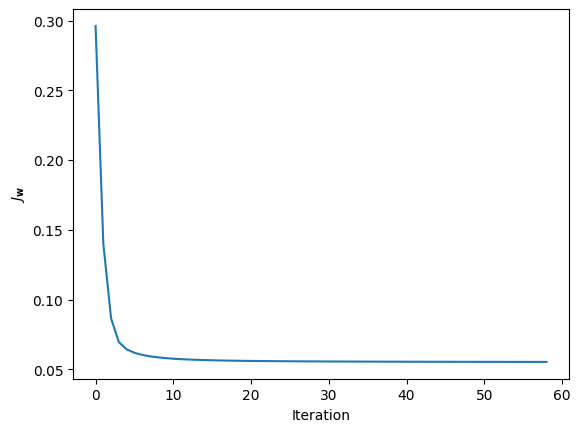

In [14]:
model.plot_cost_function()

# Aquí se nos muestra como con cada iteración que se hace, nuestra función de costo 
# se va actualizando y disminuyendo hasta alcanzar un valor mínimo estable

In [15]:
y_predictions = model.predict(X=X_test)

# Realizamos las predicciones de nuestro modelo usando los datos de prueba

In [16]:
model.get_parameters()

# Imprimimos los pesos y sesgo que obtuvo nuestro modelo después de ser entrenado
# Las primeras 5 filas son los pesos de nuestras entradas y la última fila es el sesgo

array([[-0.83457605],
       [ 0.24280479],
       [ 4.68126366],
       [ 1.05537486],
       [ 0.17704192],
       [-4.14819094]])

In [17]:
model.evaluate(y_hat=y_predictions, y=y_test)

# Evaluamos las predicciones de nuestro modelo de acuerdo a los datos verdaderos de nuestra salida
# o en otras palabras, el "Accuracy"

0.9897859922178989

### References

* El libro de Python. (s.f.). Assert en Python. Obtenido de El Libro De Python: https://ellibrodepython.com/assert-python
* InteractiveChaos. (13 de Enero de 2021). isinstance. Obtenido de InteractiveChaos: https://interactivechaos.com/es/python/function/isinstance
* Khetarpal, A. (s.f.). numpy.vstack. Obtenido de NumPy: https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
* Matthias. (3 de Noviembre de 2018). Meaning of %8.2f , %2d etc... Obtenido de Sololearn: https://www.sololearn.com/en/Discuss/1572079/meaning-of-82f-2d-etc
* Ram, V. (3 de Agosto de 2022). How to use Python numpy.where() Method. Obtenido de DigitalOcean: https://www.digitalocean.com/community/tutorials/python-numpy-where
* The SciPy community. (s.f.). scipy.special.expit. Obtenido de SciPy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html
* W3Schools. (s.f.). NumPy Array Reshaping. Obtenido de W3Schools: https://www.w3schools.com/python/numpy/numpy_array_reshape.asp

